# YOLO ONLY

In [1]:
import pandas as pd


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV file
csv_file = "/kaggle/input/yolo-only/results (1).csv"  # Change this to your actual file path
df = pd.read_csv(csv_file)
df.head()



,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,319.649,1.13178,2.04222,1.66180,0.44961,0.51991,0.47140,0.24101,1.62434,2.17688,2.56416,0.000166,0.000166,0.000166
1,2,646.043,1.18119,1.65245,1.67745,0.52399,0.51303,0.49079,0.26166,1.56892,1.93554,2.38424,0.000330,0.000330,0.000330
2,3,970.448,1.16490,1.56077,1.66393,0.63678,0.58317,0.67498,0.36805,1.49620,1.52698,2.29413,0.000490,0.000490,0.000490
3,4,1293.940,1.14203,1.48567,1.63970,0.72607,0.72410,0.78977,0.47331,1.34447,1.20339,2.17050,0.000485,0.000485,0.000485
4,5,1617.400,1.10449,1.35709,1.60470,0.74153,0.76185,0.81377,0.46950,1.37029,1.08002,2.16689,0.000480,0.000480,0.000480


In [3]:
df.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

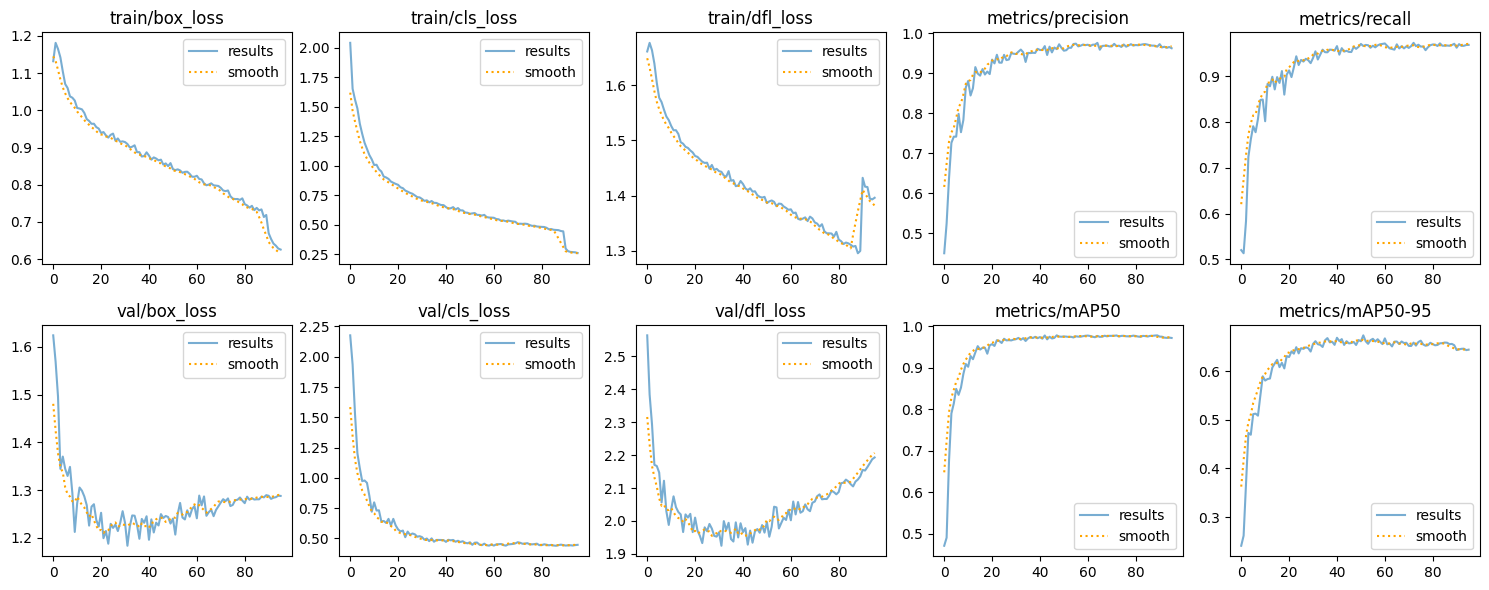

In [4]:
# Define the correct column names for plotting
columns = [
    ("train/box_loss", "train/box_loss"),
    ("train/cls_loss", "train/cls_loss"),
    ("train/dfl_loss", "train/dfl_loss"),
    ("metrics/precision(B)", "metrics/precision"),
    ("metrics/recall(B)", "metrics/recall"),
    ("val/box_loss", "val/box_loss"),
    ("val/cls_loss", "val/cls_loss"),
    ("val/dfl_loss", "val/dfl_loss"),
    ("metrics/mAP50(B)", "metrics/mAP50"),
    ("metrics/mAP50-95(B)", "metrics/mAP50-95"),
]

# Create figure and axes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

# Loop through columns and plot
for i, (col, title) in enumerate(columns):
    row, col_idx = divmod(i, 5)  # Determine subplot position
    ax = axes[row, col_idx]

    # Smooth the curve using a moving average filter
    window_size = 5
    smoothed = np.convolve(df[col], np.ones(window_size) / window_size, mode='valid')

    # Plot original and smoothed results
    ax.plot(df.index[:len(smoothed)], df[col][:len(smoothed)], label="results", alpha=0.6)
    ax.plot(df.index[:len(smoothed)], smoothed, linestyle="dotted", label="smooth", color='orange')

    ax.set_title(title)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Yolo + resnet


In [5]:
csv_file = "/kaggle/input/yolo-only/results.csv"  # Change this to your actual file path
df1 = pd.read_csv(csv_file)
df1.head()


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,114.889,2.84203,4.42517,3.75296,0.35002,0.21971,0.04509,0.02015,1.87326,3.75868,2.71864,0.000166,0.000166,0.000166
1,2,218.041,1.84854,3.42142,2.47825,0.12778,0.54615,0.18235,0.10370,1.47915,2.42429,2.22420,0.000328,0.000328,0.000328
2,3,319.340,1.46564,2.89750,2.03058,0.22986,0.53157,0.22594,0.12309,1.53453,2.19545,2.24284,0.000486,0.000486,0.000486
3,4,453.058,1.34462,2.64171,1.90376,0.17038,0.55099,0.23130,0.13363,1.39982,2.12967,2.09257,0.000479,0.000479,0.000479
4,5,559.006,1.28950,2.48513,1.84404,0.20335,0.56522,0.31140,0.18424,1.40343,1.99524,2.02227,0.000472,0.000472,0.000472


In [6]:
df1.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

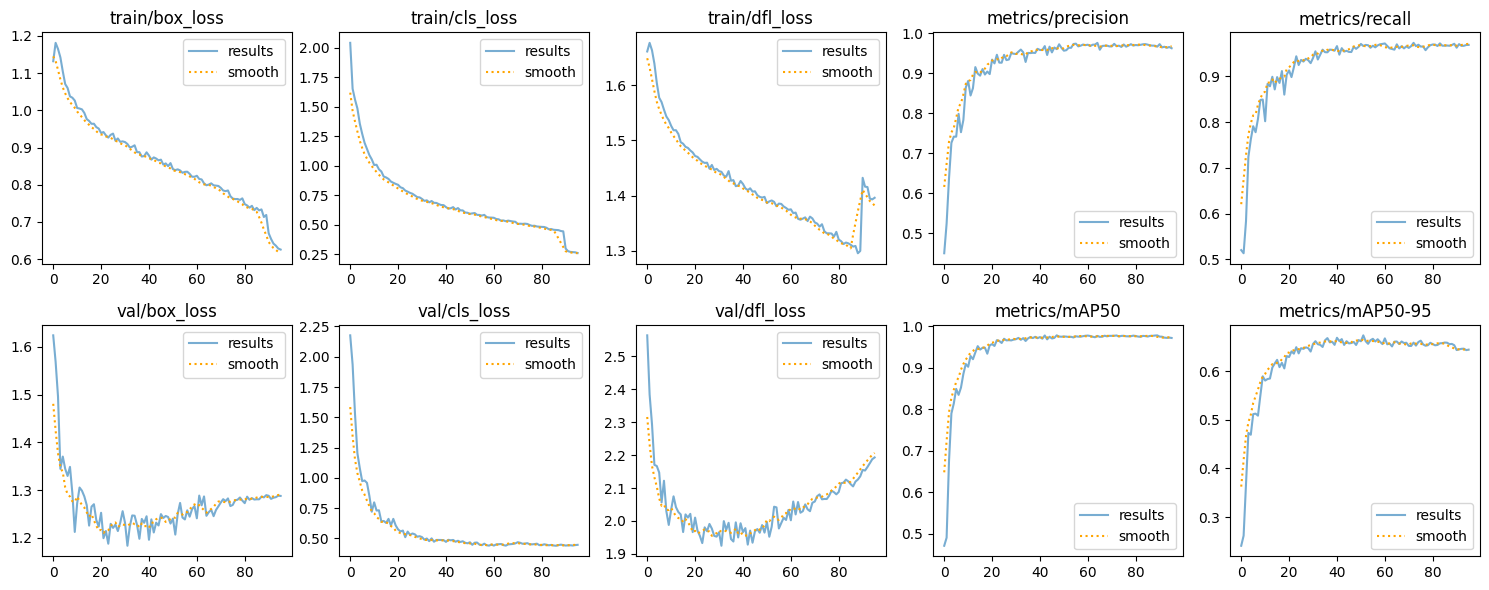

In [7]:
# Define the correct column names for plotting
columns = [
    ("train/box_loss", "train/box_loss"),
    ("train/cls_loss", "train/cls_loss"),
    ("train/dfl_loss", "train/dfl_loss"),
    ("metrics/precision(B)", "metrics/precision"),
    ("metrics/recall(B)", "metrics/recall"),
    ("val/box_loss", "val/box_loss"),
    ("val/cls_loss", "val/cls_loss"),
    ("val/dfl_loss", "val/dfl_loss"),
    ("metrics/mAP50(B)", "metrics/mAP50"),
    ("metrics/mAP50-95(B)", "metrics/mAP50-95"),
]

# Create figure and axes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

# Loop through columns and plot
for i, (col, title) in enumerate(columns):
    row, col_idx = divmod(i, 5)  # Determine subplot position
    ax = axes[row, col_idx]

    # Smooth the curve using a moving average filter
    window_size = 5
    smoothed = np.convolve(df[col], np.ones(window_size) / window_size, mode='valid')

    # Plot original and smoothed results
    ax.plot(df.index[:len(smoothed)], df[col][:len(smoothed)], label="results", alpha=0.6)
    ax.plot(df.index[:len(smoothed)], smoothed, linestyle="dotted", label="smooth", color='orange')

    ax.set_title(title)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()